In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [ ]:
#A build model and predict,metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


R² Score: 0.9059
MSE: 2.9078
RMSE: 1.7052


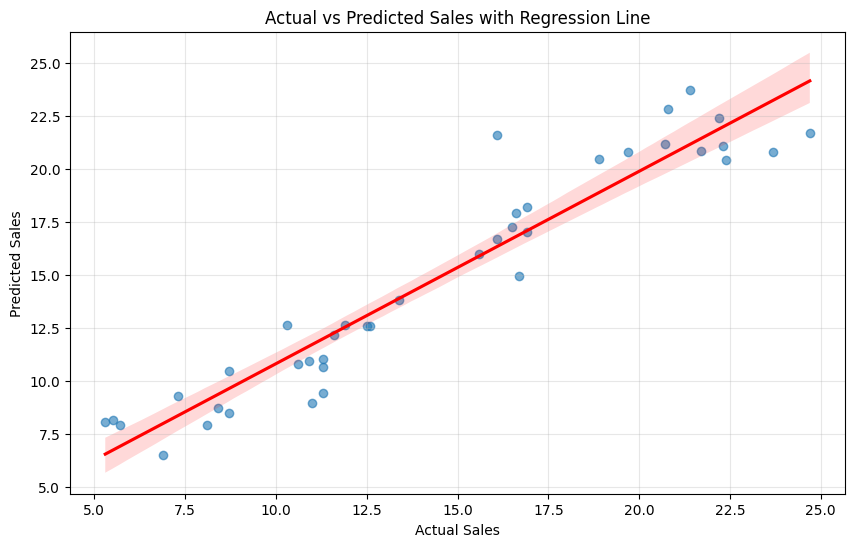

In [ ]:
#B plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True, alpha=0.3)
plt.show()


# Ridge Regression and Comparison of results

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
lr_pred = y_pred
lr_model = model

# Ridge Regression
ridge_model = Ridge(alpha=800, random_state=42)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

#result comparison
results = {
    'Linear Regression': {
        'R²': r2_score(y_test, lr_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
        'Coefficients': lr_model.coef_
    },
    'Ridge Regression': {
        'R²': r2_score(y_test, ridge_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, ridge_pred)),
        'Coefficients': ridge_model.coef_
    }
}

print("RESULTS:")
print("=" * 50)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  R² Score: {metrics['R²']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  Coefficients: {[f'{c:.4f}' for c in metrics['Coefficients']]}")


MODEL COMPARISON

Linear Regression:
  R² Score: 0.9059
  RMSE: 1.7052
  Coefficients: ['0.0545', '0.1009', '0.0043']

Ridge Regression:
  R² Score: 0.9049
  RMSE: 1.7145
  Coefficients: ['0.0545', '0.0983', '0.0050']


In [ ]:
#with weak regularuization the accuracy was same, with string regularization accuracy decreased a bit. Accuracy decreased to generalize for few data points and thus iyt improved generalization